In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
x = np.arange(-8, 8, 0.1)
f = 1/(1 + np.exp(-x))

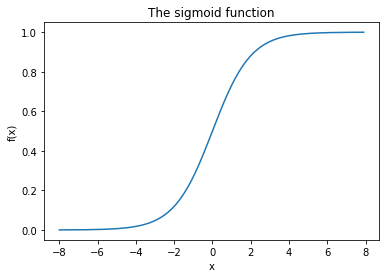

In [8]:
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("The sigmoid function", loc = 'center')
plt.show()

What does changing the weights do in a simple network?

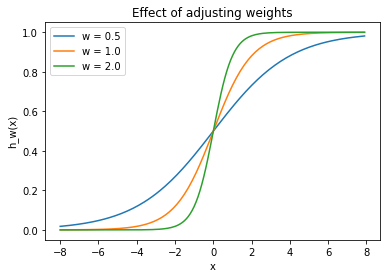

In [11]:
w1 = 0.5
w2 = 1.0
w3 = 2.0
l1 = 'w = 0.5'
l2 = 'w = 1.0'
l3 = 'w = 2.0'
for w, l in [(w1, l1), (w2, l2), (w3, l3)]:
    f = 1/(1 + np.exp(-x*w))
    plt.plot(x, f, label = l)
plt.xlabel('x')
plt.ylabel('h_w(x)')
plt.title("Effect of adjusting weights", loc = 'center')
plt.legend(loc= 2)
plt.show()

Here we can see that changing the weight changes the slope of the output of the sigmoid activation function, which can be useful if we want to model different strengths of relationships between the inout and output variables. However, what if we only wnat to output to change when x is greater than 1? - bias unit:

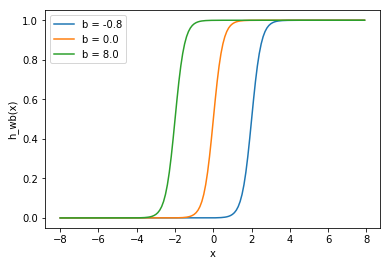

In [17]:
w = 4.0
b1 = -8.0
b2 = 0.0
b3 = 8.0
l1 = 'b = -0.8'
l2 = 'b = 0.0'
l3 = 'b = 8.0'
for b, l in [(b1, l1), (b2, l2), (b3, l3)]:
    f = 1/(1 + np.exp(-(x*w + b)))
    plt.plot(x, f, label = l)
plt.xlabel('x')
plt.ylabel('h_wb(x)')
plt.legend(loc = 2)
plt.show()

# The feed-forward pass

Let's consider the simple case of input layer (3 input units), 1 hidden layer and output layer.

In [21]:
w1 = np.array([[0.2, .2, .2],[.4, .4, .4], [.6, .6, .6]])

In [29]:
w2 = np.zeros((1, 3))
w2[0,:] = np.array([0.5, 0.5,0.5])

Set up some dummy values in the layer 1 bias weight array/vector and the layer 2 bias weight which is only a single value in this neural network structure i.e. a scalar)

In [30]:
b1 = np.array([0.8, 0.8, 0.8])
b2 = np.array([0.2])

In [31]:
def f(x):
    return 1/(1 + np.exp(-x))

In [54]:
def simple_looped_nn_calc(n_layers, x, w, b):
    for l in range(n_layers - 1):
        """Setup th einput array which the weights will be multiplied by for each layer
        If it's the first layer, the input array will be the x input vector
        If it's not the first layer, the input to the next layer will be the output of the previous layer"""
        if l == 0:
            node_in = x
        else:
            node_in = h
        #Set up the output array for the nodes in layer l + 1
        h = np.zeros((w[l].shape[0],))
        #Loop through the rows of the weight array
        for i in range(w[l].shape[0]):
            #setup the sum inside the activation function
            f_sum = 0
            #loop through the columns of the weight array
            for j in range(w[l].shape[1]):
                f_sum += w[l][i][j] * node_in[j]
            #add the bias 
            f_sum += b[l][i]
            #finally use the activation function to calculate the i-th output i.e h1, h2, h3
            h[i] = f(f_sum)
    return h

The function takes as input the number of layers in the neural network, the x input array/vector, then Python tuples or lists of the weight and bias of the networks

In [51]:
w = [w1, w2]
print(len(w))
print(w)
#print(w[1][1][1])
b = [b1, b2]
print(b)
#a dummy x input vector
x = [1.5, 2.0, 3.0]

2
[array([[0.2, 0.2, 0.2],
       [0.4, 0.4, 0.4],
       [0.6, 0.6, 0.6]]), array([[0.5, 0.5, 0.5]])]
[array([0.8, 0.8, 0.8]), array([0.2])]


In [55]:
simple_looped_nn_calc(3, x, w, b)

array([0.83545566])

Using loops is not the most efficient way of calculating the feed forward step in Python. This is because loops are very slow

In [56]:
%timeit simple_looped_nn_calc(3, x, w, b)

20.9 µs ± 695 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Vectorization in neural networks

# Gradient Descent and optimisation

MNIST dataset is a record of images of hand written digits with asssociated labels that telss us whata the digit is. Each image is a 8x8 pixels in size, and the image data sample is represnted by 64 data points which denote the pixel intensity

In [59]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

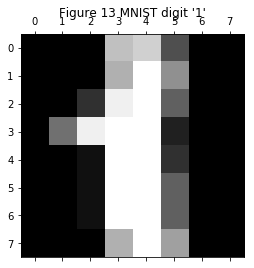

In [61]:
plt.gray()
plt.matshow(digits.images[1])
plt.title("Figure 13 MNIST digit '1'", loc = "center")
plt.show()

In [66]:
digits.images[1].shape

(8, 8)

# Scalind data

Why do we need to scale the input data?  First, let's have a look at one of the dataset pixel representations:

In [68]:
digits.data[0,:]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Notice that the input data ranges from 0 up to 15? - scale the input data so that it all fits mostly between 0 to 1 or -1 to 1. I can help the convergence of the neural network

In [69]:
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler()
X = X_scale.fit_transform(digits.data)

In [70]:
X[0,:]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

# Creating test and training datasets

In [71]:
from sklearn.model_selection import train_test_split
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4 )

# Setting up the output layer

A sensible neural network architecture will have an output layer of 10 nodes (as we need the output layer to predict whether the digit represented by the input pixels is between 0 and 9), with each of these nodes representing a digit from 0 and 9. We want to train the network so that when, say, an image of digit "5" is presented to the neural network, the node in the output layer representing 5 has the highest value. Ideally we would want to see an output looking like this: [0,0,0,0,0,1,0,0,0,0]. However, in reality we can settle for something like this: [0.01, 0.1, 0.2, 0.05, 0.3, 0.8, 0.4, 0.03, 0.25, 0.02] In this case we can take the maximum index of the output array and call that our predicted digit.

For the MNIST data supplied in the scikit learn dataset, the “targets” or the classification of the handwritten digits is in the form of a single number. We need to convert that single number into a vector so that it lines up with our 10 node output layer. In other words, if the target value in the dataset is “1” we want to convert it into the vector: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]. The code below does just that:

In [73]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [75]:
def convert_y_to_vect(y):
        y_vect = np.zeros((len(y), 10))
        for i in range(len(y)):
            y_vect[i, y[i]] = 1
            
        return y_vect

In [76]:
y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)
y_train[0], y_v_train[0]

(1, array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]))

# Creating the neural network

The next step is to specify the structure of the neural network. For the input layer, we know we need 64 nodes to cover the 64 pixels in the image. Usually the number of hidden layers nodes is somewhere between the number of input layers and the number of output layers, Let's define a simple python list that designates the structure of our network:


In [80]:
nn_structure = [64, 30, 10]

Setup the sigmoid function and its derivative:

In [78]:
def f(x):
    return 1/(1 + np.exp(-x))

In [79]:
def f_deriv(x):
    return f(x)*(1-f(x))

Randomly initialise the weights for each layer 􏰅(􏰆) While iterations < iteration limit:
1. Set ΔW and Δb to zero
2. For samples 1 to m:
a. Perform a feed forward pass through all the 􏰇􏰆 layers. Store the activation function outputs h(􏰆)
b. Calculate the 􏰈(􏰉􏰊) value for the output layer
c. Use backpropagation to calculate the 􏰈(􏰆) values for layers 2 to 􏰇􏰆 − 1
d. Update the Δ􏰅(􏰆) and Δ􏰋(􏰆) each layer 
3. Perform a gradient descent step using:

Updates

So the first step is to initialise the weights for each layer. To make it easy to organise the various layers, we’ll use Python dictionary objects (initialised by {}). Finally, the weights have to be initialised with random values – this is to ensure that the neural network will converge correctly during training. We use the numpy library random_sample function to do this. The weight initialisation code is shown below:

In [97]:
import numpy.random as r
def setup_and_init_weights(nn_structure):
    W = {}
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1]))
        b[l] = r.random_sample((nn_structure[l],))
        
    return W, b

The next step is to set the mean accumulation values to be zero (they need to be the same size as the weight and bias matrices)

In [98]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l - 1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

If we now step into the gradient descent loop, the first step is to perform a feed forward pass through the network. The code is a variation on the feed forward function

In [99]:
def feed_forward(x, W, b):
    h = {1: x}
    z = {}
    for l in range(1, len(W) + 1):
        #if it is the first layer, then the input into weights is x, otherwise,
        #it is the output from the last layer
        if l == 1:
            node_in = x
        else:
            node_in = h[l]
        z[l + 1] = np.dot(W[l],node_in) + b[l]
        h[l + 1] = f(z[l + 1])
    return h, z

Finally, we have to calculate the output layer delata and any hidden layer delta values to perform the backpropagation pass

In [100]:
def calculate_out_layer_delta(y, h_out, z_out):
    return -(y - h_out) * f_deriv(z_out)

In [101]:
def calculate_hidden_delta(delta_plus_1, w_1, z_1):
    return np.dot(np.transpose(w_1), delta_plus_1)*f_deriv(z_1)

In [113]:
def train_nn(nn_structure, X, y, iter_num = 3000, alpha = 0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    m = len(y)
    avg_cost_func = []
    print('Strating gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt % 1000 == 0:
            print("Iteration {} of {}".format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(len(y)):
            delta = {}
            #perform the feed forward pass and return the stored h and z values, to be used in the gradient descent
            h, z = feed_forward(X[i, :], W, b)
            #loop from nl - 1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i, :], h[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-h[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    tri_W[l] += np.dot(delta[l+1][:, np.newaxis], np.transpose(h[l][:,np.newaxis]))
                    tri_b[l] += delta[l+1]
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha*(1.0/m * tri_W[l])
            b[l] += -alpha*(1.0/m * tri_b[l])
        avg_cost = 1.0/m * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func

In [117]:
import time
start = time.time()
W, b, avg_cost_func = train_nn(nn_structure, X_train, y_v_train)
end = time.time()
duration = (end - start)
duration

Strating gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000


210.45911812782288

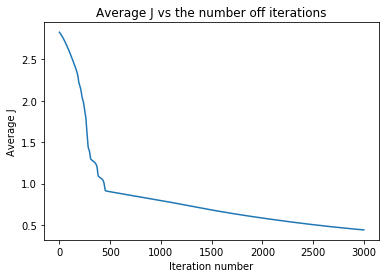

In [120]:
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.title("Average J vs the number off iterations", loc = "center")
plt.show()


We can see in the above plot, that by 3,000 iterations of our gradient descent our average cost function value has started to “plateau” and therefore any further increases in the number of iterations isn’t likely to improve the performance of the network by much.

# Assessing the accuracy of the trained model

In [121]:
def predict_y(W, b, X, n_layers):
    m = X.shape[0]
    y = np.zeros((m,))
    for i in range(m):
        h, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(h[n_layers])
    return y

In [123]:
from sklearn.metrics import accuracy_score
y_pred = predict_y(W, b, X_test, 3)
round(accuracy_score(y_test, y_pred),2)

0.87